In [299]:
import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.insert(0,"C:/Users/Dustin/Desktop/Numerische Methoden/VS Code/NM-Code-for-Excercises")
import shortcuts as s

In [314]:
#set1
x1data = np.asfarray([1.1, 1.9, 3.2, 4.1, 4.9, 6.3])
y1data = np.asfarray([6.0, 5.1, 3.9, 2.2, 4.0, 6.2])

#set2
x2data = np.asfarray([0.9, 1.8, 3.1, 3.9, 4.8, 6.1])
y2data = np.asfarray([1.0, 5.5, 6.0, 1.4, 0.9, 4.5])

print(np.shape(x1data)[0])

matrix = np.identity(5)

6


In [331]:

def cubic_spline_interpolation(x,xdata,ydata):
    N = np.shape(xdata)[0]                             #Anzahl der Stützpunkte xdata_i
    
    loc = 0

    i = 0

    while i < N-1:
        if xdata[i] <= x < xdata[i+1]:
            loc = i
        i += 1

    if x >= xdata[N-1]:
        loc = N - 2                                      #loc ist bei unterem Stützpunkt, also bei j

    
    matrix = np.zeros((N-2,N-2))
    b = np.zeros(N-2)

    #Fall: j = 1, erste Zeile der Matrix mit nur 2 Elementen, statt 3

    matrix[0][0] = (xdata[2]-xdata[0])/3                            #y1''
    matrix[0][1] = (xdata[2]-xdata[1])/6                            #y2''
    b[0] = ((ydata[2]-ydata[1])/(xdata[2]-xdata[1]))-((ydata[1]-ydata[0])/(xdata[1]-xdata[0]))

    j = 2

    i = 1
    while i < N-3:
        matrix[i][i-1] = (xdata[j]-xdata[j-1])/6
        matrix[i][i] = (xdata[j+1]-xdata[j-1])/3
        matrix[i][i+1] = (xdata[j+1]-xdata[j])/6
        b[i] = ((ydata[j+1]-ydata[j])/(xdata[j+1]-xdata[j]))-((ydata[j]-ydata[j-1])/(xdata[j]-xdata[j-1]))
        j += 1
        i += 1

    
    #Fall: j = N - 3, letzte Zeile der Matrix mit nur 2 Elementen, statt 3

    matrix[N-3][N-4] = (xdata[N-2]-xdata[N-3])/6
    matrix[N-3][N-3] = (xdata[N-1]-xdata[N-3])/3
    b[N-3] = ((ydata[N-1]-ydata[N-2])/(xdata[N-1]-xdata[N-2]))-((ydata[N-2]-ydata[N-3])/(xdata[N-2]-xdata[N-3]))
 
    
    y2 = np.asfarray([0])
    y2 = np.append(y2, s.lgs_solver_crout(matrix,b))
    y2 = np.append(y2,0)

    if loc > np.size(y2)-2:
        loc = np.size(y2) - 2

    A = (xdata[loc+1]-x)/(xdata[loc+1]-xdata[loc])
    B = 1 - A

    ylinear = A*ydata[loc] + B*ydata[loc+1]

    C = (1/6)*((A**3)-A)*((xdata[loc+1]-xdata[loc])**2)
    D = (1/6)*((B**3)-B)*((xdata[loc+1]-xdata[loc])**2)

    p = C*y2[loc] + D*y2[loc+1]

    y = ylinear + p
    
    return y
    #return matrix,b


In [302]:
cubic_spline_interpolation(2,x1data,y1data)

4.953267997458985

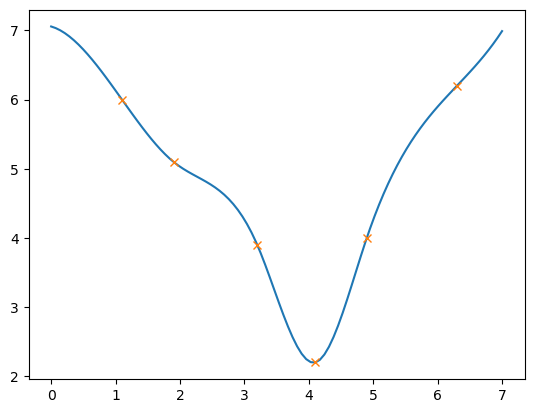

In [334]:
#set1
xrange = np.linspace(0,7,100)

yrange = np.asfarray([])
for i in xrange:
    yrange = np.append(yrange,cubic_spline_interpolation(i,x1data,y1data))


#print(xrange)
#print(yrange)

plt.plot(xrange,yrange)
plt.plot(x1data,y1data,"x")


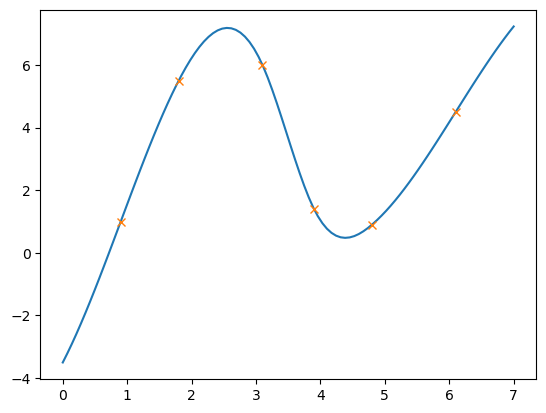

In [335]:
#set2
xrange = np.linspace(0,7,100)

yrange = np.asfarray([])
for i in xrange:
    yrange = np.append(yrange,cubic_spline_interpolation(i,x2data,y2data))


#print(xrange)
#print(yrange)

plt.plot(xrange,yrange)
plt.plot(x2data,y2data,"x")


Lösung gemäß des Plots:  0.6192695652173913


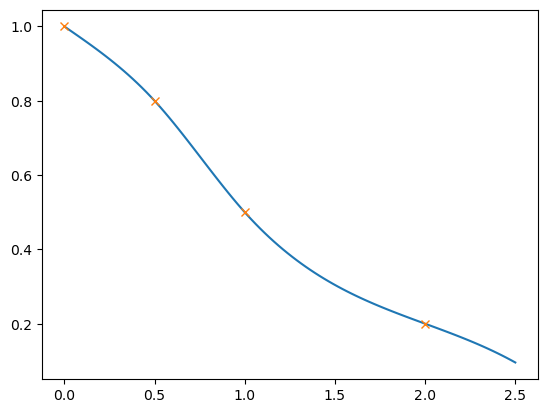

In [337]:
#set3, Aufgabe 2

x3data = np.asfarray([0,0.5,1,2])
y3data = np.asfarray([1,0.8,0.5,0.2])

xrange = np.linspace(0,2.5,100)

yrange = np.asfarray([])
for i in xrange:
    yrange = np.append(yrange,cubic_spline_interpolation(i,x3data,y3data))


#print(xrange)
#print(yrange)

plt.plot(xrange,yrange)
plt.plot(x3data,y3data,"x")

result = cubic_spline_interpolation(0.8,x3data,y3data)

print("Lösung gemäß des Plots: ", result)